In [1]:
from __future__ import annotations
from astropy.table import QTable
from astropy.visualization import quantity_support
import matplotlib.path as mpath
import numpy.lib.recfunctions as rfn

import matplotlib.pyplot as plt
import numpy as np

In [2]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f9acb72eee0>

In [3]:
table = QTable.read("joined-GD-1.fits")
table.colnames

['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'phot_g_mean_mag',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'ruwe',
 'astrometric_matched_transits',
 'phi1',
 'phi2',
 'pm_phi1_cosphi2',
 'pm_phi1_cosphi2_unrefl',
 'pm_phi2',
 'pm_phi2_unrefl',
 'star_mask',
 'g0',
 'r0',
 'i0',
 'z0',
 'y0']

In [4]:
print(table.colnames)

['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'phot_g_mean_mag', 'phot_g_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_bp_mean_flux_over_error', 'phot_rp_mean_mag', 'phot_rp_mean_flux_over_error', 'ruwe', 'astrometric_matched_transits', 'phi1', 'phi2', 'pm_phi1_cosphi2', 'pm_phi1_cosphi2_unrefl', 'pm_phi2', 'pm_phi2_unrefl', 'star_mask', 'g0', 'r0', 'i0', 'z0', 'y0']


In [5]:
pm_vertices = np.array([[-15, -5], [-15, -3], [-12, -3], [-12, -5]])
path = mpath.Path(pm_vertices)

In [6]:
sel_data = path.contains_points(np.c_[table["pm_phi1_cosphi2_unrefl"], table["pm_phi2_unrefl"]])
good = (table['g0']>-30) & (table['r0']>-30)
sel_data = sel_data & good 

In [7]:
sel_data.sum()

11371

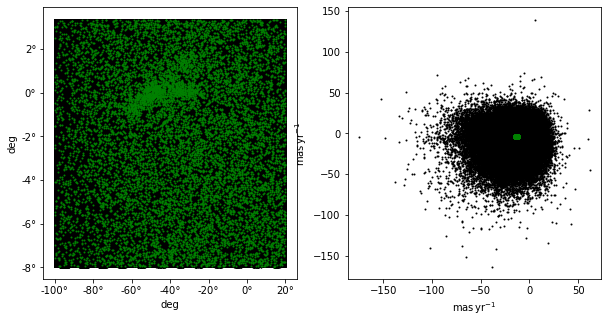

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(table["phi1"], table["phi2"], s=1, rasterized=True, c="k")
axs[0].scatter(table["phi1"][sel_data], table["phi2"][sel_data], s=1, c="green", rasterized=True)


axs[1].scatter(table["pm_phi1_cosphi2_unrefl"], table["pm_phi2_unrefl"], s=1, rasterized=True, c="k")
axs[1].scatter(table["pm_phi1_cosphi2_unrefl"][sel_data], table["pm_phi2_unrefl"][sel_data], s=10, c="green", rasterized=True)
# axs[1].scatter(*pm_vertices.T)

In [9]:
#table['phot']
#bp_rp = table["phot_bp_mean_mag"]-table["phot_rp_mean_mag"]
table.keys()

['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'phot_g_mean_mag',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'ruwe',
 'astrometric_matched_transits',
 'phi1',
 'phi2',
 'pm_phi1_cosphi2',
 'pm_phi1_cosphi2_unrefl',
 'pm_phi2',
 'pm_phi2_unrefl',
 'star_mask',
 'g0',
 'r0',
 'i0',
 'z0',
 'y0']

In [10]:
table["g0-r0"]=table["g0"]-table["r0"]

In [11]:
data = rfn.structured_to_unstructured(np.array(table[["phi1", "phi2", "parallax", "pm_phi1_cosphi2_unrefl", "pm_phi2_unrefl",
                                                      "g0","g0-r0"]][sel_data]))

# rescaling
for i in range(data.shape[1]):
    data[:, i] = (data[:, i] - np.nanmean(data[:, i])) / np.nanstd(data[:, i])
    
# missing data
data[table["parallax"][sel_data] <= 0, 2] = np.nan

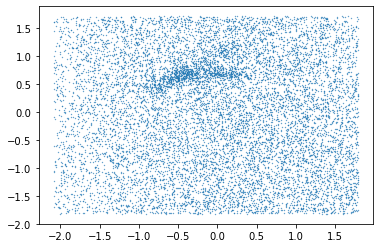

In [12]:
plt.scatter(data[:,0],data[:,1],s=.1)
off_stream_bool = data[:,1] < -0.5

In [13]:
  
def scaled_g_r_func(g,params):
    """
    Polynomial is of the form (g'-r')(g') = ag'^3 + bg'^2 + cg' + d
    """
    a,b,c,d = params
    return a*(g**3) + b*(g**2) + c*g + d



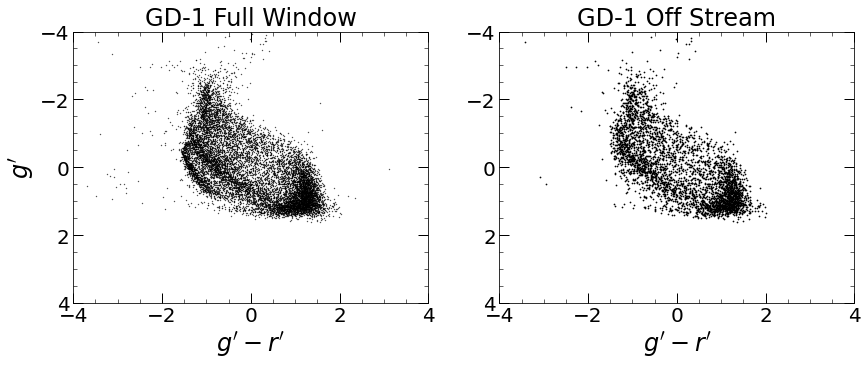

In [14]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,5)
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


# matplotlib ticks
for i in range(2):
    ax[i].tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    ax[i].minorticks_on() #Minor
    ax[i].tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor


ax[0].scatter(data[:,-1],data[:,-2],rasterized=True,s=.1,color='k')
ax[0].set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
ax[0].set_ylabel(r'$g^\prime$',fontsize=24)
#ax[0].set_xlim(-1,1)
ax[0].set_title('GD-1 Full Window',fontsize=24)

ax[1].scatter(data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.5,color='k')
ax[1].set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
#ax[0].set_ylabel(r'$g^\prime$',fontsize=24)
ax[1].set_xlim(-1,1)
ax[1].set_title('GD-1 Off Stream',fontsize=24)





cmd_params = np.array([.01,.08,.02,-.2])
g_inp = np.linspace(-4,2,100)
g_minus_r_prime_model = scaled_g_r_func(g_inp,cmd_params)

#ax[0].plot(g_minus_r_prime_model,g_inp,color='cyan',label='Test Input')


for i in range(2):
    ax[i].set_xlim(-4,4)
    ax[i].set_ylim(-4,4)
    ax[i].invert_yaxis()
#plt.savefig('gd1_cmd.pdf')
    

In [15]:
import torch
from torch import nn
from torch import optim

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation
import torch.utils.data as Data


g_prime_minus_r_prime_off = data[off_stream_bool,-2]-data[off_stream_bool,-1]
g_prime_off = data[off_stream_bool,-2]
CMD_torch = torch.tensor(np.vstack([g_prime_minus_r_prime_off,g_prime_off]).T).float()
CMD_torch.shape

torch.Size([3925, 2])

In [16]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2, 
                                                          hidden_features=16))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())



BATCH_SIZE = 50
torch_dataset = Data.TensorDataset(CMD_torch) #g_theta_dxdt_obs
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)



In [83]:


BATCH_SIZE = 50
torch_dataset = Data.TensorDataset(CMD_torch) #g_theta_dxdt_obs
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)



/Users/jnibauer/opt/anaconda3/envs/MachineLearnGravPotential/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


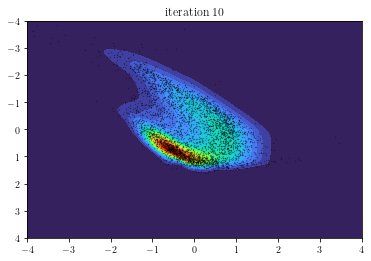

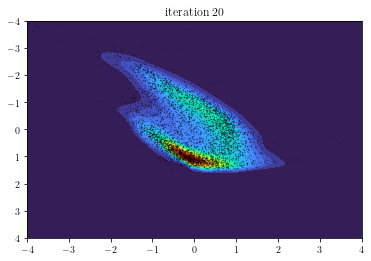

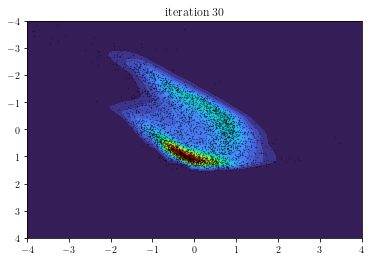

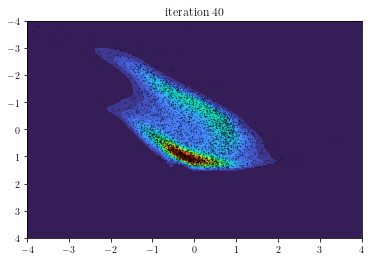

KeyboardInterrupt: 

In [18]:
EPOCH = 5000
for g in optimizer.param_groups:
    g['lr'] = 1e-3

for epoch in range(EPOCH):
    for step, cmd in enumerate(loader):
        optimizer.zero_grad()
        loss = -flow.log_prob(inputs=cmd[0]).mean()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        xline = torch.linspace(-4., 4.,200)
        yline = torch.linspace(-4, 4.,201)
        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid = flow.log_prob(xyinput).exp().reshape(len(xline), len(yline))

        plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
        plt.title('iteration {}'.format(epoch + 1))
        plt.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
        plt.xlim(-4,4)
        plt.ylim(-4,4)
        plt.gca().invert_yaxis()
        plt.show()


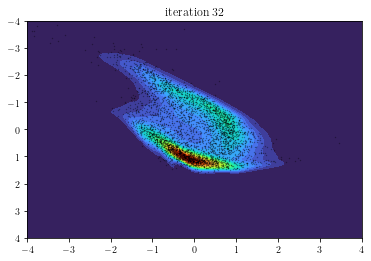

In [86]:
xline = torch.linspace(-4., 4.,200)
yline = torch.linspace(-4, 4.,201)
xgrid, ygrid = torch.meshgrid(xline, yline)
xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

with torch.no_grad():
    zgrid = flow.log_prob(xyinput).exp().reshape(len(xline), len(yline))

    plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
    plt.title('iteration {}'.format(epoch + 1))
    plt.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    #ax[0].set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
    #ax[0].set_ylabel(r'$g^\prime$',fontsize=24)
    plt.gca().invert_yaxis()
    plt.show()
    

In [87]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2, 
                                                          hidden_features=16))
transform = CompositeTransform(transforms)

flow_on = Flow(transform, base_dist)
optimizer = optim.Adam(flow_on.parameters())



BATCH_SIZE = 50
torch_dataset = Data.TensorDataset(CMD_torch) #g_theta_dxdt_obs
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)



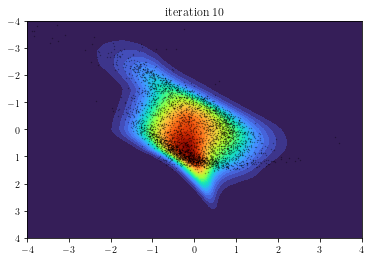

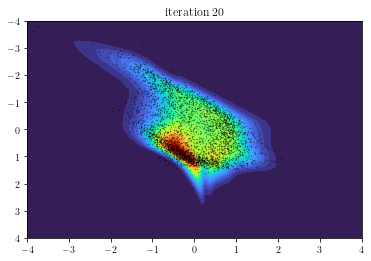

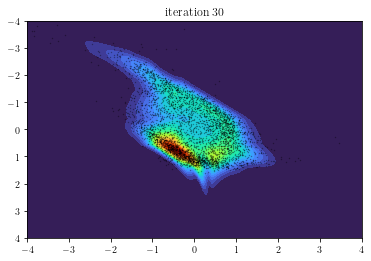

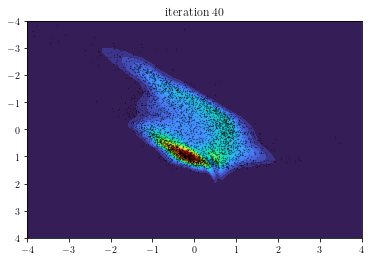

KeyboardInterrupt: 

In [88]:
EPOCH = 5000
for g in optimizer.param_groups:
    g['lr'] = 1e-3

for epoch in range(EPOCH):
    for step, cmd in enumerate(loader):
        optimizer.zero_grad()
        loss = -flow_on.log_prob(inputs=cmd[0]).mean()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        xline = torch.linspace(-4., 4.,200)
        yline = torch.linspace(-4, 4.,201)
        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid = flow_on.log_prob(xyinput).exp().reshape(len(xline), len(yline))

        plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
        plt.title('iteration {}'.format(epoch + 1))
        plt.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
        plt.xlim(-4,4)
        plt.ylim(-4,4)
        plt.gca().invert_yaxis()
        plt.show()


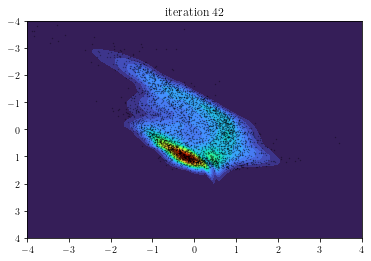

In [89]:
xline = torch.linspace(-4., 4.,200)
yline = torch.linspace(-4, 4.,201)
xgrid, ygrid = torch.meshgrid(xline, yline)
xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

with torch.no_grad():
    zgrid = flow_on.log_prob(xyinput).exp().reshape(len(xline), len(yline))

    plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
    plt.title('iteration {}'.format(epoch + 1))
    plt.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    #ax[0].set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
    #ax[0].set_ylabel(r'$g^\prime$',fontsize=24)
    plt.gca().invert_yaxis()
    plt.show()
    

## ML

In [90]:
# https://nbviewer.jupyter.org/github/tingyuansen/deep-potential/blob/master/notebooks/plummer_sphere_example.ipynb
#import sys
#sys.path.append('/global/u2/j/jnibauer/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages')
import torch
from torch.autograd import Variable
print(f'Pytorch version {torch.__version__}')
import numpy as np
#import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch.nn as nn
import torch.utils.data as Data
#import matplotlib.colors as mcolors
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator
#from matplotlib.gridspec import GridSpec
#import astropy.units as u
#from time import time
#import re
#import json
#import toy_systems
#import agama
from matplotlib import rc

#from nflows.flows.base import Flow
#from nflows.distributions.normal import StandardNormal
#from nflows.transforms.base import CompositeTransform
#from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
#from nflows.transforms.permutations import ReversePermutation

import torch.nn as nn
import torch.utils.data as Data
from tqdm.notebook import tqdm
from matplotlib import patches
import torch.nn as nn
import torch.utils.data as Data
from scipy.stats import norm

Pytorch version 1.13.0


In [91]:
data_A = torch.tensor(data[:,:-2]).float()
data_C = torch.tensor(data[:,-2:]).float()
data_C[:, [1, 0]] = data_C[:, [0, 1]]
data_C

tensor([[ 0.6390,  0.4650],
        [-1.1805, -1.3118],
        [ 0.4932,  1.3150],
        ...,
        [ 0.4614, -0.5182],
        [ 1.4316,  1.3033],
        [-0.8013, -0.5663]])

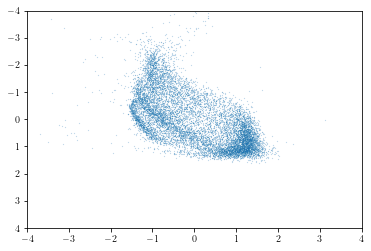

In [92]:
#data_C = torch.tensor(data[:,-2:]).float()
plt.scatter(data_C[:,0],data_C[:,1],s=.01)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().invert_yaxis()


In [93]:
rand_mask = np.isnan(data_A[:,1:].numpy()) #TRUE WHERE MASKED
data_torch = torch.clone(data_A)#torch.tensor(data_A).float()
data_torch[torch.isnan(data_A)] = torch.tensor([0.]).float()

data_CMD = torch.clone(data_C)


#data_torch = torch.tensor(data).float()
#data_torch[torch.isnan(data_torch)] = torch.tensor([0.]).float()
#cov_avail = torch.zeros(len(data_torch),5,5).float() #inf where masked, 0 otherwise
#rand_mask_5d = rand_mask[:,1:] # n_star x 5
#for i in range(len(cov_avail)):
#    mask_column_bool = rand_mask_5d[i,:] # length of 5
#    cov_avail[i,mask_column_bool,mask_column_bool] = torch.inf
    
cov_avail = torch.zeros(len(data_torch),4).float() #inf where masked, 0 otherwise
rand_mask_4d = rand_mask[:,:] # n_star x 5
for i in range(len(cov_avail)):
    mask_column_bool = rand_mask_4d[i,:] # length of 5
    cov_avail[i,mask_column_bool] = True#true where masked
    
cov_avail = cov_avail==0 # !!!!!!!!!!will be true where NOT MASKED!!!!!!!!!!!
BATCH_SIZE = 1500 #10 #50#5000#128 #Number of sampling locations to feed in at any point
EPOCH = 5000
#cov_avail.requires_grad = True


torch_dataset = Data.TensorDataset(data_torch[:,0].view(-1,1),data_torch[:,1:],cov_avail,data_CMD)
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)


def neg_log_like(phi1,data_vector,cov_predict, cov_avail,f,mu_predict,mu_min,mu_max,log_off_CMD,log_on_CMD): #-2,2
    """
    shape(phi1) = n_star x 1
    shape(data_vector) = n_star x 5 with zeros where there is missing data
    shape(cov_predict) = nstar x 5 x 5: sigma for each phase space dimension (diagonal matrix)
    shape(cov_avail) = nstar x 5 x 5: diagonal matrix of zeros and infs for each star. Infs where there is no data
    shape(f) = n_star x 1
    shape(mu_predict) = n_star x 5
    shap(mu_min) = 5 x 1: min value for data in each phase space dim.
    shape(mu_max) = 5 x 1: max value for data in each phase space dim.
    log_on_CMD = n_star 
    log_off_CMD = n_star 
    """
    cov_total = cov_predict ##+ cov_avail 
    inv_cov_total = torch.inverse(cov_total) # nstar x 5 x 5
    data_minus_model = data_vector - mu_predict # n_star x 5
    right_product = torch.einsum('ijk,ik->ij',inv_cov_total,data_minus_model) # n_star x 5
    right_product[~cov_avail] = torch.tensor([0.]).float()
    exp_arg = -0.5*torch.sum(data_minus_model*right_product,dim=1)  # n_star
    det_arr = torch.zeros(len(cov_total))
    unif_normalization_arr = torch.zeros(len(cov_total))
    for i in range(len(det_arr)):
        det_arr[i] = torch.prod(cov_total[i,cov_avail[i,:],cov_avail[i,:]])
        unif_normalization_arr[i] = torch.prod(mu_max[cov_avail[i,:],0] - mu_min[cov_avail[i,:],0])
    #print(unif_normalization_arr)
    ####print(cov_total.shape,cov_avail.shape)
    
    #gaussian_prefac = torch.sqrt( ( (2.0*torch.pi)**5. )*torch.det(cov_total) ) # n_star
    gaussian_prefac = torch.sqrt( ( (2.0*torch.pi)**5. )*det_arr ) # n_star
    log_stream_comp = torch.log(f.flatten()) - torch.log(gaussian_prefac) + exp_arg + log_on_CMD # n_star
    unif_normalization = unif_normalization_arr#torch.prod(mu_max - mu_min)
    log_uniform_comp = torch.log(1.-f) - torch.log(unif_normalization) + log_off_CMD
    log_like_arr = torch.log( torch.exp(log_stream_comp) + torch.exp(log_uniform_comp) )
    log_like = torch.sum(log_like_arr)
    #print(log_like)
    return -log_like    
    
class Net(nn.Module):
    def __init__(self,bool_mask=None):
        super().__init__() #Initializes methods from nn.Module, which is necessary to use all of the functions that we want:https://www.educative.io/edpresso/what-is-super-in-python
        self.fc1 = nn.Linear(1,36) #So first layer has 1 node, second has 10
        self.fc2 = nn.Linear(36,36) #second has 10 nodes, third has 10
        self.fc3 = nn.Linear(36,36)
        self.fc4 = nn.Linear(36,9) # (d1, d2, d3, d4, sig1, sig2, sig3, sig4, f)
        #self.bool_mask = bool_mask #either none or boolean mask array shape: neval x 5
        #self.fc4 = nn.Linear(500,1)
        #self.dropout = nn.Dropout(0.4)#.1
        
    def forward(self,x): #feed data forward
        x = torch.tanh(self.fc1(x))#,dim=1)       
        x = torch.tanh(self.fc2(x))#,dim=1)
        x = torch.tanh(self.fc3(x))#,dim=1)
        out = self.fc4(x) 
        
        mean_phase_space = out[:,:4]
        sigma_phase_space = torch.sigmoid(out[:,4:8])*.5 #.3
        f = torch.sigmoid(out[:,-1])*.45
        #if self.bool_mask == None:
        return mean_phase_space, sigma_phase_space,f.view(-1,1)
        #else:
        #    sigma_phase_space[self.bool_mask] = torch.tensor([100000000000.]).float()#torch.inf
        #    return mean_phase_space, sigma_phase_space,f.view(-1,1)
net = Net()
params = list(net.parameters()) + list(flow_on.parameters())
optimizer = torch.optim.Adam(params, lr=1e-3,weight_decay=1e-10)#,weight_decay=1e-8)#,weight_decay=1e-4)#,weight_decay=1e-8)#1e-3
phi_test = torch.linspace(-1,1,100).view(-1,1)
mean_phase_space, sigma_phase_space,f = net(phi_test)
sigma_phase_space.shape
cov_mat = torch.zeros(len(phi_test)*4,4)

#cov_mat.fill_diagonal_(5)
#cov_mat.fill_diagonal_(2,wrap=True)[:10]




In [94]:
f.shape

torch.Size([100, 1])

In [95]:
optimizer = torch.optim.Adam(params, lr=1e-4,weight_decay=1e-8)
BATCH_SIZE = 100 #10 #50#5000#128 #Number of sampling locations to feed in at any point
EPOCH = 5000



torch_dataset = Data.TensorDataset(data_torch[:,0].view(-1,1),data_torch[:,1:],cov_avail,data_CMD)
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)
#cov_avail.requires_grad = True



In [96]:
#plt.scatter(dat_CMD_avail[:,1],dat_CMD_avail[:,0],s=.1)
#plt.gca().invert_yaxis()

In [97]:
flow_on.log_prob(data_CMD)

tensor([-1.8434, -3.3003, -1.7502,  ..., -1.9158, -3.3803, -2.8508],
       grad_fn=<AddBackward0>)

In [98]:
for epoch in range(EPOCH):
    if epoch % 1 == 0:
        print(epoch)
    for step, (phi1_dat, dat_vec, dat_cov_avail, dat_CMD_avail) in enumerate(loader):
        #net.bool_mask = dat_cov_avail
        mean_phase_space, sigma_phase_space,f = net(phi1_dat)
        flow_on_log_prob = flow_on.log_prob(dat_CMD_avail)#.view(-1,1)
        if torch.isnan(flow_on_log_prob).sum()>0:
            print('nan')
        with torch.no_grad():
            flow_off_log_prob = flow.log_prob(dat_CMD_avail)#.view(-1,1)
            if torch.isnan(flow_on_log_prob).sum()>0:
                print('nan0')
        #phi2_mean, sig, f = NN_out[:,0].view(-1,1), NN_out[:,1].view(-1,1), NN_out[:,2].view(-1,1)
        cov_predict = torch.zeros(len(phi1_dat),4,4)
        
        for idx in range(len(phi1_dat)):
            cov_predict[idx,:,:] = torch.eye(4)*(sigma_phase_space[idx,:]**2)
        #print(cov_predict)
        loss_val = neg_log_like(phi1_dat,dat_vec,cov_predict, dat_cov_avail,f,mean_phase_space,
                                torch.min(data_torch[:,1:],dim=0)[0].view(-1,1),torch.max(data_torch[:,1:],dim=0)[0].view(-1,1),
                               flow_off_log_prob,flow_on_log_prob)
        if torch.isnan(loss_val).sum()>0:
            print('nan_loss')
        optimizer.zero_grad()
        loss_val.backward()         
        optimizer.step()
        net.zero_grad()
        flow_on.zero_grad()
        flow.eval()
        ##flow.zero_grad()
        
    if epoch % 5 == 0:
        with torch.no_grad():
            phi1_plot = torch.linspace(-1.3,1.3,100).view(-1,1)
            #net.bool_mask = None
            mean_phase_space, sigma_phase_space,f = net(phi1_plot)
            #phi2_mean, sig, f = NN_out[:,0].view(-1,1), NN_out[:,1].view(-1,1), NN_out[:,2].view(-1,1)
            #loss_val = neg_log_like(phi1_dat,phi2_dat,f,phi2_mean,sig)
            #print(loss_val)
            
            #mean_out, sig_out, pdf_out  = plot_out(phi1_plot)
            dimplot = 0
            plt.errorbar(x=phi1_plot[:,0],y=mean_phase_space[:,dimplot],yerr=sigma_phase_space[:,dimplot]/2)
            plt.show()

        
    

0
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0
nan_loss
nan
nan0

KeyboardInterrupt: 

In [605]:
flow_on_log_prob,flow_off_log_prob

(tensor([ -6.9861,  -2.5127,  -1.7774, -25.1570, -13.8323, -13.9077,  -9.3013,
         -10.4878,  -1.6836, -15.6742,  -3.7835,  -1.1356,  -8.9584, -27.1382,
          -8.8158,  -7.3973,  -5.8258,  -3.2411,  -3.4842, -14.0315,  -0.3964,
          -0.6594,  -6.7796,  -3.1098,  -6.3706,  -5.4761,  -9.3702,  -5.8761,
          -6.0183,  -5.6381,  -1.9412,  -1.7123,  -5.4355,  -2.0884,  -0.1712,
          -5.5889,  -2.7506,  -3.9546,  -2.7347,  -4.0776,  -9.0261,  -2.3500,
          -5.5429,  -4.0633,  -4.5839,  -5.8478, -13.1465,  -7.7986,  -4.5158,
          -5.7814,  -7.2709, -24.5791,  -2.0876, -10.1326, -32.5269,  -5.3518,
          -1.9106,  -5.6045,  -5.0594,  -1.6976,  -3.7354,  -2.8532,  -3.7349,
          -3.0416,  -7.8783,  -2.7293,  -4.9600,  -6.4694,  -2.9518,  -8.8077,
          -7.2447,  -5.8420, -24.7139,  -2.7678,  -2.1879,  -0.2141,  -1.4117,
          -2.8501,  -6.5720, -21.7039,  -6.7001,  -2.0621,  -2.2390,  -2.5775,
          -4.8160,  -3.9451,  -4.7878,  -7.1321, -26

In [606]:
mu_min = torch.min(data_torch[:,1:],dim=0)[0].view(-1,1)
mu_max = torch.max(data_torch[:,1:],dim=0)[0].view(-1,1)
with torch.no_grad():
    phi1_plot = torch.linspace(-2.5,2.5,150).view(-1,1)
    y_axis_plot = torch.linspace(-2.5,1.8,151)
    mean_phase_space, sigma_phase_space,f = net(phi1_plot)
    stream_heatmap = np.zeros((len(phi1_plot),len(y_axis_plot),4))
    
    #flow_inp_g_r = torch.linspace(-4,4,150
    

    for i in range((mean_phase_space.shape[1])):
        for j in range(len(phi1_plot)):
            pdf_val = norm.pdf(x=y_axis_plot,loc=mean_phase_space[j,i],scale=sigma_phase_space[j,i])
            stream_heatmap[j,:,i]= f[j].numpy()*pdf_val/( f[j].numpy()*pdf_val + (1.0-f[j].numpy()*(1./torch.prod(mu_max - mu_min).numpy()) ) )
        #np.random.normal(loc=mean_phase_space[i,:]
#mean_phase_space.shape     

In [607]:
mu_min

tensor([[-1.8257],
        [-0.6024],
        [-2.0447],
        [-1.8386]])

/var/folders/rq/9c89gb15479bjnxrpnmdf_p40000gn/T/ipykernel_3870/1411680561.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cbar = ax[1,i].pcolormesh(phi1_plot[:,0].numpy(), y_axis_plot.numpy(),stream_heatmap[:,:,i].T,cmap=plt.get_cmap('turbo'),rasterized=True)


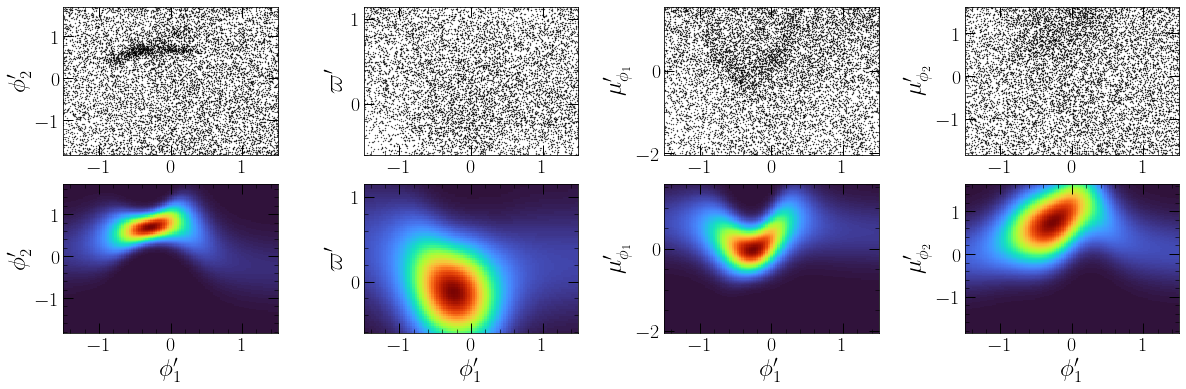

In [608]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,6)
flat_ax = ax.flatten()

# matplotlib ticks
for i in range(len(flat_ax)):
    flat_ax[i].tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    flat_ax[i].minorticks_on() #Minor
    flat_ax[i].tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor

for i in range(4):
    ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='k',s=.1)
    #ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='cyan',s=1.)
    ax[0,i].set_xlim(-1.5,1.5)
    ax[0,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    
    cbar = ax[1,i].pcolormesh(phi1_plot[:,0].numpy(), y_axis_plot.numpy(),stream_heatmap[:,:,i].T,cmap=plt.get_cmap('turbo'),rasterized=True)
    ax[1,i].set_xlim(-1.5,1.5)
    ax[1,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    
    ax[1,i].set_xlabel(r'$\phi^\prime_1$',fontsize=24)
    
ax[0,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)
ax[1,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)

ax[0,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)
ax[1,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)

ax[0,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)
ax[1,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)

#ax[0,3].set_ylabel(r'$v_r^\prime$',fontsize=24)
#ax[1,3].set_ylabel(r'$v_r^\prime$',fontsize=24)

ax[0,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
ax[1,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
fig.subplots_adjust(wspace=.4)
    
##plt.savefig('gd1_density_net_with_iso.pdf')

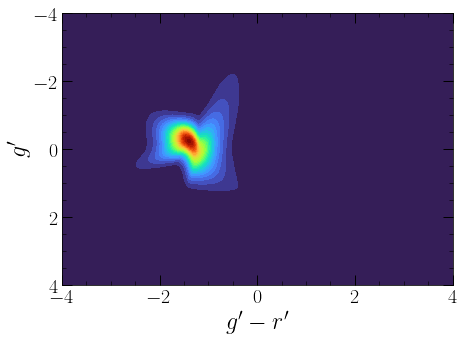

In [611]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
for i in range(1):
    ax.tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    ax.minorticks_on() #Minor
    ax.tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor



xline = torch.linspace(-4., 4.,200)
yline = torch.linspace(-4, 4.,201)
xgrid, ygrid = torch.meshgrid(xline, yline)
xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

with torch.no_grad():
    zgrid = flow_on.log_prob(xyinput).exp().reshape(len(xline), len(yline))

    ax.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
    #ax.settitle('iteration {}'.format(epoch + 1))
    #ax.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
    ax.set_ylabel(r'$g^\prime$',fontsize=24)
    ax.invert_yaxis()
    #plt.savefig('cmd_stream_comp.pdf',bbox_inches='tight')
    #plt.gca().invert_yaxis()
    #plt.show()

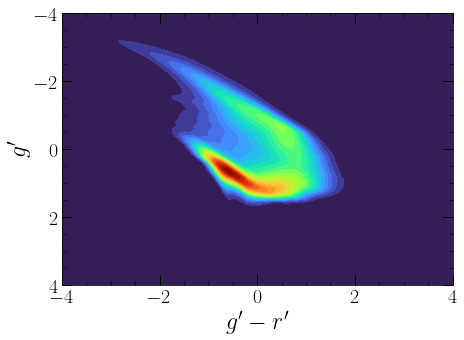

In [610]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
for i in range(1):
    ax.tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    ax.minorticks_on() #Minor
    ax.tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor



xline = torch.linspace(-4., 4.,200)
yline = torch.linspace(-4, 4.,201)
xgrid, ygrid = torch.meshgrid(xline, yline)
xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

with torch.no_grad():
    zgrid = flow.log_prob(xyinput).exp().reshape(len(xline), len(yline))

    ax.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
    #ax.settitle('iteration {}'.format(epoch + 1))
    #ax.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.invert_yaxis()
    ax.set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
    ax.set_ylabel(r'$g^\prime$',fontsize=24)
    #plt.savefig('cmd_background_comp.pdf',bbox_inches='tight')
    ##plt.savefig('cmd_background.pdf')
    #plt.gca().invert_yaxis()
    #plt.show()

In [103]:
from scipy.stats import norm
def plot_out(data_torch):
    mean, sig, frac = net(data_torch[:,0].view(-1,1))
    member_prob = np.zeros_like(data_torch[:,0].view(-1,1).numpy())
    print(frac.shape)
    for i in range(len(mean)):
        member_prob_num = frac[i]*stats.multivariate_normal.pdf(x=data_torch[i,1:].numpy(),mean=mean[i,:].numpy(), cov=np.eye(4)*sig[i,:].numpy())
        member_prob_denom = member_prob_num + (1.-frac[i])*(1./np.prod(mu_min.numpy()*mu_max.numpy()))
        member_prob[i] = member_prob_num/member_prob_denom
    return member_prob
    
with torch.no_grad():
    phi1_plot = data_torch[:,0].view(-1,1)#torch.linspace(-1,1,100).view(-1,1)
    maybe_members = plot_out(data_torch)
    #net_out_at_data = net(data_torch[:,0].view(-1,1))
    #mean_dat, sig_dat, f_dat = net_out_at_data[:,0], net_out_at_data[:,1], net_out_at_data[:,2]
    


torch.Size([11723, 1])


In [104]:
data_torch

tensor([[-1.3281, -1.7343,  0.0000,  0.4023,  0.9229],
        [-1.3384, -1.6336, -0.0856, -0.3228, -1.0297],
        [-1.3326, -1.6157, -0.3850,  1.3381,  1.1372],
        ...,
        [-1.4959, -1.6694,  0.5221,  0.8044,  1.0056],
        [-1.4878, -1.7410, -0.1381, -0.3657,  0.1050],
        [-1.4765, -1.7847,  0.0193, -0.1739, -1.3991]])

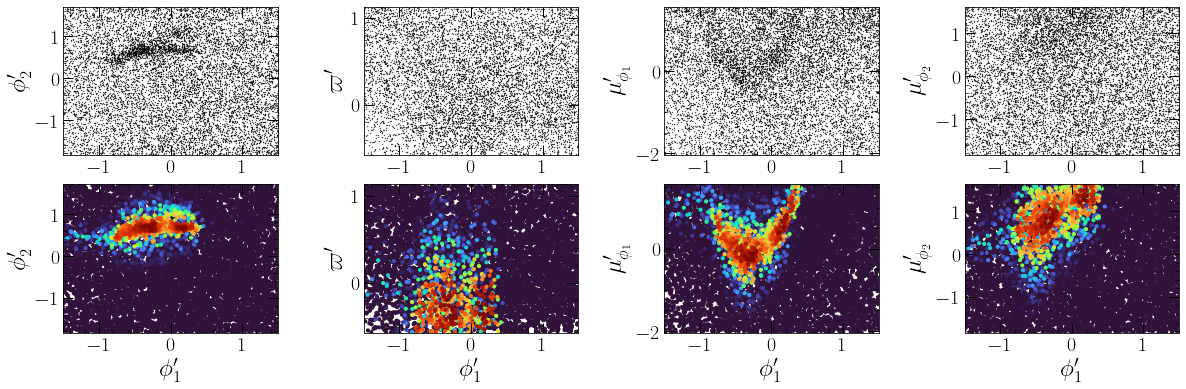

In [113]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,6)
flat_ax = ax.flatten()

# matplotlib ticks
for i in range(len(flat_ax)):
    flat_ax[i].tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    flat_ax[i].minorticks_on() #Minor
    flat_ax[i].tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor

for i in range(4):
    ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='k',s=.1)
    #ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='cyan',s=1.)
    ax[0,i].set_xlim(-1.5,1.5)
    ax[0,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    inds = np.argsort(maybe_members.flatten())#np.argsort(-maybe_members)
    
    cbar = ax[1,i].scatter(data[inds,0],data[inds,i+1],rasterized=True,c=maybe_members[inds],s=10,cmap=plt.get_cmap('turbo'))
    
    #cbar = ax[1,i].pcolormesh(phi1_plot[:,0].numpy(), y_axis_plot.numpy(),stream_heatmap[:,:,i].T,cmap=plt.get_cmap('turbo'),rasterized=True)
    ax[1,i].set_xlim(-1.5,1.5)
    ax[1,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    
    ax[1,i].set_xlabel(r'$\phi^\prime_1$',fontsize=24)
    
ax[0,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)
ax[1,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)

ax[0,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)
ax[1,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)

ax[0,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)
ax[1,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)

#ax[0,3].set_ylabel(r'$v_r^\prime$',fontsize=24)
#ax[1,3].set_ylabel(r'$v_r^\prime$',fontsize=24)

ax[0,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
ax[1,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
fig.subplots_adjust(wspace=.4)
    
##plt.savefig('gd1_density_net_membership.pdf')

In [110]:
np.argsort(maybe_members.flatten())

array([11722,  7477,  7478, ...,  5239,  5184,  6235])

ValueError: x and y must have same first dimension, but have shapes torch.Size([11723, 1]) and (150, 1)

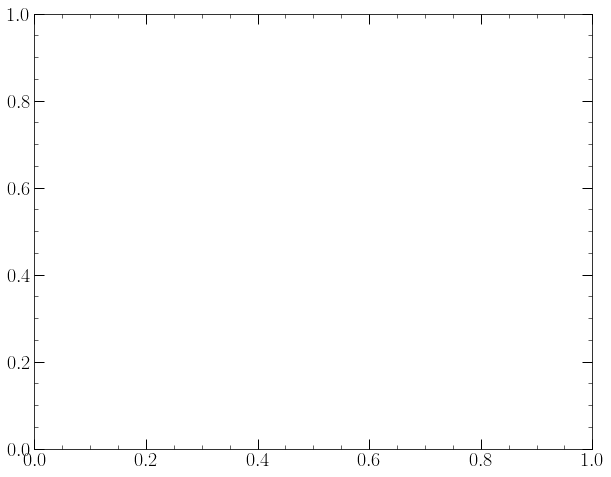

In [83]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,8)

# matplotlib ticks
for i in range(1):
    ax.tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    ax.minorticks_on() #Minor
    ax.tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor
ax.plot(phi1_plot,f.numpy(),color='k')
ax.set_xlabel(r'$\phi_1$',fontsize=25)
ax.set_ylabel(r'$a_1(\phi_1)$',fontsize=25)
#plt.savefig('gd1_lin_density.pdf',rasterized=True)

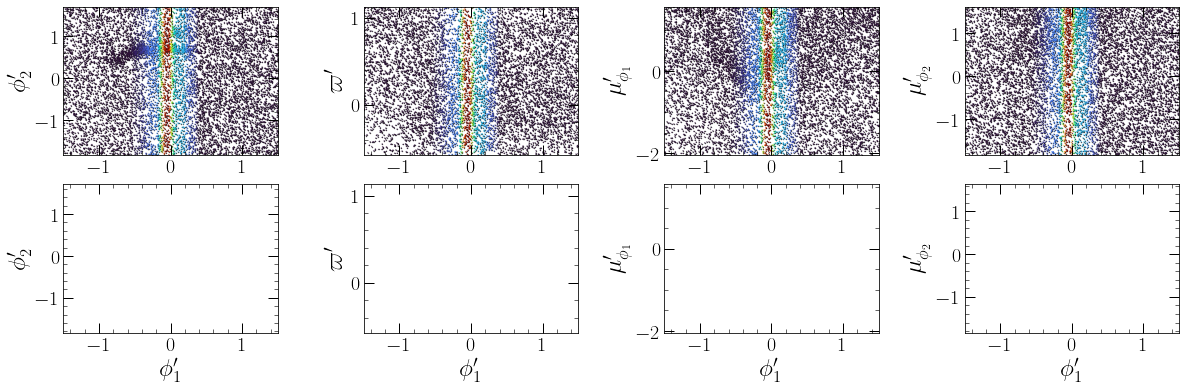